# Assignment 02 Part 1: Perceptron

In [53]:
'''Imports'''

from sklearn import metrics
import statistics
from sklearn import preprocessing
from scipy.special import expit
from scipy.spatial import distance
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random


In [28]:
'''Data'''

train_data = np.loadtxt("mnist_train.csv", delimiter = ",")
train_input = [ np.append(1,d[1:]) for d in train_data ]
test_data = np.loadtxt("mnist_test.csv", delimiter = ",")
test_input = [ np.append(1,d[1:]) for d in test_data ]

Training Data Shape: (60000, 785)
60000 elements, 785 inputs including bias 

Testing Data Shape: (10000, 785)
10000 elements, 785 inputs including bias 
 

Some MNIST images resized to (28,28) with their respective labels


<function matplotlib.pyplot.show(*args, **kw)>

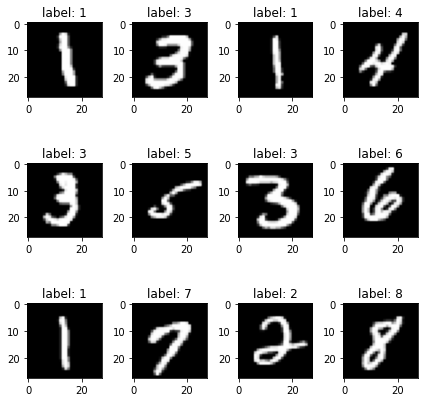

In [69]:
'''1.5 Print MNIST Data'''
    
print("Training Data Shape:", train_data.shape)
print(str(len(train_input)), "elements,", str(len(train_input[1])), "inputs including bias", "\n")

print("Testing Data Shape:", test_data.shape)
print(str(len(test_input)), "elements,", str(len(test_input[1])), "inputs including bias", "\n", "\n")

train_label = [ int(d[0]) for d in train_data ]
test_label = [ int(d[0]) for d in test_data ]

fig, axes = plt.subplots(3, 4, figsize=(6,6))
print("Some MNIST images resized to (28,28) with their respective labels")
for i in range(12):
     data = train_input[i + 6][1:].reshape(28,28)
     label = train_label[i+6]
     ax = axes[i//4, i%4]
     ax.imshow(data, cmap="Greys_r")
     ax.set_title('label: {}'.format(label))
plt.tight_layout()
plt.show

### Perceptron  Class

In [71]:
             
random.seed(42)

class Perceptron:
    
    '''1.1 Complete the implementation of the Perceptron'''      
    
    def __init__(self, no_inputs=785, max_iterations=40, learning_rate=0.5,
                activation = "Sigmoid", #/step
                learning = "Batch", #/SGD
                target = 7): 
        self.no_inputs = no_inputs
        self.weights = (2*np.random.random((no_inputs)) - 1)/ no_inputs
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        self.activation = activation 
        self.learning = learning
        self.target = target

    def print_details(self):
        print("No. inputs:\t" + str(self.no_inputs))
        print("Max iterations:\t" + str(self.max_iterations))
        print("Learning rate:\t" + str(self.learning_rate))
        
    #=========================================#
    #   Step Function                         #
    #=========================================#
    def step(self, inputs):
        _sum_ = np.matmul(inputs, self.weights)
        a = _sum_
        if a > 0:  #step function
            return 1
        return 0
    
    
    '''1.4 Use the sigmoid activation function''' 

    def sigmoid(self, inputs):   
        a = np.matmul(inputs, self.weights)
        sigmoid = 1/ (1+ np.exp(-1 * a))
        return sigmoid

    #======================================#
    # Trains the perceptron using labelled #
    # training data.                       #
    #======================================#
    
    def train(self, training_data, labels):
        if self.learning == "SGD":
        
            for i in range(self.max_iterations):
                t = 0
                total_samples = len(training_data)
                for d in range(len(training_data)):
                
                    x = training_data[d]
                    if self.activation == "Sigmoid":
                        o = self.sigmoid(x)
                    else:
                        o = self.step(x)
                    t = labels[d] 
                    r = self.learning_rate

                    self.weights += r * (t-o) * x

                    
        '''1.2 Update your percpetron to use batch learning'''
        
        else:
            r = self.learning_rate
            total_samples = len(training_data)
            cost = np.zeros(785,)
            for i in range(self.max_iterations):
                for d in range(len(training_data)):
                    x = training_data[d]
                    if self.activation == "Sigmoid":
                        o = self.sigmoid(x)  
                    else: 
                        o = self.step(x)
                    t = labels[d]       
                    cost += r * (t-o) * x
                self.weights += cost
        #self.weights = self.weights/total_samples
        
    #=========================================#
    # Tests the prediction on each element of #
    # the testing data. Prints the precision, #
    # recall, and accuracy of the perceptron. #
    #=========================================#
    
    def test(self, testing_data, labels):
        assert len(testing_data) == len(labels)
        
        t = []
        o = []
        error = 0
        for count in range(len(testing_data)):
        
            x = testing_data[count] #inputs
            if self.activation == "Sigmoid":
                o.append(self.sigmoid(x))
            else:
                o.append(self.step(x))
            t.append(labels[count])
        
        #print nice
        example = []
        for i in o[:10]:
            example.append(int(i))
        print("Predictions", example)
        t = labels
        examplet = []
        for i in t[:10]:
            examplet.append(int(i))
        print("True Labels", examplet)
        
        a = np.array(o[:10])
        if np.array_equal(a, a[:10].astype(bool)) == False:
            #MSE for Sigmoid original outputs
            #since these values are not binary
            print("MSE: ", ("%.2f" % metrics.mean_squared_error(t, o)))
        else:    
        #Classification metrics for step function
            print("Accuracy:\t", metrics.accuracy_score(t, o))  
            print("Precision:\t", metrics.precision_score(t, o))
            print("Recall:\t", metrics.recall_score(t, o))

## Main
### 1. Target digit 7
The following cell(s) completes parts 1.1, 1.2, 1.4 and 1.5.

-----
Target:7
No. inputs:	785
Max iterations:	40
Learning rate:	0.5

 Testing untrained perceptron: 
Predictions [1, 1, 0, 1, 1, 1, 0, 1, 0, 1]
True Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy:	 0.26265
Precision:	 0.06395535755293254
Recall:	 0.44453312051077415
Untrained weights:

 Training...
Done!

Testing trained perceptron: 
Predictions [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Labels [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy:	 0.9698
Precision:	 0.9776315789473684
Recall:	 0.7227626459143969
Trained weights: 


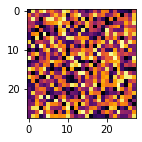

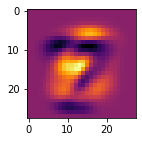

In [75]:
p = Perceptron(activation = "sigmoid")
train_label = [ int(d[0] == p.target) for d in train_data ]
test_label = [ int(d[0] == p.target) for d in test_data ]
print("-----")
print("Target:" + str(p.target))
p.print_details()
print("\n Testing untrained perceptron: ")
p.test(train_input, train_label)


'''1.5. Print weights'''

fig = plt.figure(figsize=(2,2))
data = p.weights[1:].reshape(28,28)
plt.imshow(data, cmap = "inferno_r")
plt.show()


print("Untrained weights:")
fig = plt.figure(figsize=(2,2))
data = p.weights[1:].reshape(28,28)
plt.imshow(data, cmap="inferno_r")
plt.draw()

print("\n Training...")
p.train(train_input, train_label) 
print("Done!")

print("\nTesting trained perceptron: ")
p.test(test_input, test_label)
print("Trained weights: ")



'''1.5. Print weights'''

fig = plt.figure(figsize=(2,2))
data = p.weights[1:].reshape(28,28)
plt.imshow(data, cmap = "inferno_r")
plt.show()

### 2. Target digit = 0-9

The following cell completes 1.3

-----
Target:0
No. inputs:	785
Max iterations:	50
Learning rate:	0.5

 Testing untrained perceptron: 
Predictions [0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
True Labels [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy:	 0.6882666666666667
Precision:	 0.1841233750185359
Recall:	 0.6289042714840453
Untrained weights:

 Training...
Done!

Testing trained perceptron: 
Predictions [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
True Labels [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Accuracy:	 0.989
Precision:	 0.9298418972332015
Recall:	 0.960204081632653
Trained weights:


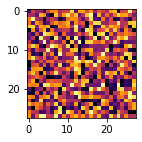

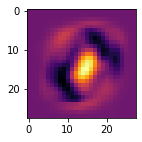

-----
Target:1
No. inputs:	785
Max iterations:	50
Learning rate:	0.5

 Testing untrained perceptron: 
Predictions [0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
True Labels [0, 0, 0, 1, 0, 0, 1, 0, 1, 0]
Accuracy:	 0.8116
Precision:	 0.29778368794326243
Recall:	 0.498220112726194
Untrained weights:

 Training...
Done!

Testing trained perceptron: 
Predictions [0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
True Labels [0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
Accuracy:	 0.9927
Precision:	 0.9682539682539683
Recall:	 0.9674008810572687
Trained weights:


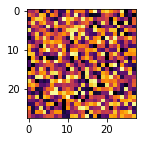

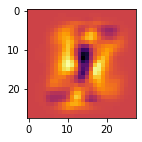

-----
Target:2
No. inputs:	785
Max iterations:	50
Learning rate:	0.5

 Testing untrained perceptron: 
Predictions [1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
True Labels [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Accuracy:	 0.20243333333333333
Precision:	 0.10033578814820468
Recall:	 0.8826787512588117
Untrained weights:

 Training...
Done!

Testing trained perceptron: 
Predictions [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
True Labels [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy:	 0.9321
Precision:	 0.6145360155743024
Recall:	 0.9176356589147286
Trained weights:


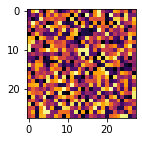

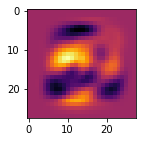

-----
Target:3
No. inputs:	785
Max iterations:	50
Learning rate:	0.5

 Testing untrained perceptron: 
Predictions [1, 1, 0, 1, 0, 1, 1, 1, 0, 1]
True Labels [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Accuracy:	 0.29106666666666664
Precision:	 0.10500618449319706
Recall:	 0.7892676561735443
Untrained weights:

 Training...
Done!

Testing trained perceptron: 
Predictions [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy:	 0.9432
Precision:	 0.6606104651162791
Recall:	 0.9
Trained weights:


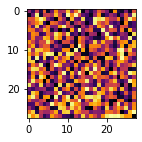

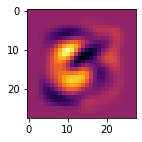

-----
Target:4
No. inputs:	785
Max iterations:	50
Learning rate:	0.5

 Testing untrained perceptron: 
Predictions [1, 0, 0, 0, 0, 1, 1, 0, 1, 1]
True Labels [0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
Accuracy:	 0.4158
Precision:	 0.07112233511481764
Recall:	 0.41458404655939746
Untrained weights:

 Training...
Done!

Testing trained perceptron: 
Predictions [0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
True Labels [0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
Accuracy:	 0.9678
Precision:	 0.9495912806539509
Recall:	 0.709775967413442
Trained weights:


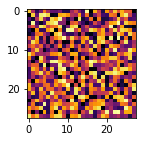

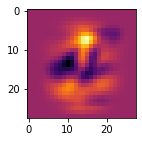

-----
Target:5
No. inputs:	785
Max iterations:	50
Learning rate:	0.5

 Testing untrained perceptron: 
Predictions [1, 0, 1, 1, 0, 0, 1, 0, 1, 1]
True Labels [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy:	 0.45603333333333335
Precision:	 0.05886738630101462
Recall:	 0.33499354362663714
Untrained weights:

 Training...
Done!

Testing trained perceptron: 
Predictions [0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
True Labels [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Accuracy:	 0.933
Precision:	 0.581858407079646
Recall:	 0.8845291479820628
Trained weights:


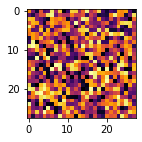

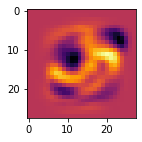

-----
Target:6
No. inputs:	785
Max iterations:	50
Learning rate:	0.5

 Testing untrained perceptron: 
Predictions [0, 0, 0, 0, 1, 0, 1, 0, 1, 1]
True Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy:	 0.7599833333333333
Precision:	 0.1341957740405347
Recall:	 0.26292666441365325
Untrained weights:

 Training...
Done!

Testing trained perceptron: 
Predictions [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy:	 0.9806
Precision:	 0.9483568075117371
Recall:	 0.8434237995824635
Trained weights:


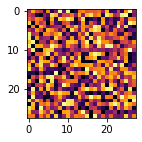

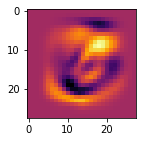

-----
Target:7
No. inputs:	785
Max iterations:	50
Learning rate:	0.5

 Testing untrained perceptron: 
Predictions [1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
True Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy:	 0.23536666666666667
Precision:	 0.1060211246593599
Recall:	 0.8507581803671189
Untrained weights:

 Training...
Done!

Testing trained perceptron: 
Predictions [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Labels [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy:	 0.9745
Precision:	 0.9662243667068757
Recall:	 0.7791828793774319
Trained weights:


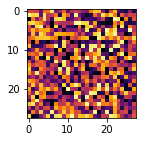

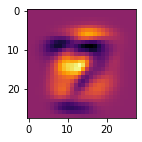

-----
Target:8
No. inputs:	785
Max iterations:	50
Learning rate:	0.5

 Testing untrained perceptron: 
Predictions [0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
True Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy:	 0.5481666666666667
Precision:	 0.09926484448633364
Recall:	 0.4500085455477696
Untrained weights:

 Training...
Done!

Testing trained perceptron: 
Predictions [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
True Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy:	 0.8907
Precision:	 0.46628895184135977
Recall:	 0.8449691991786448
Trained weights:


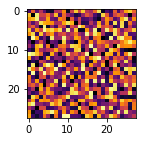

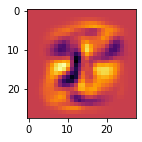

-----
Target:9
No. inputs:	785
Max iterations:	50
Learning rate:	0.5

 Testing untrained perceptron: 
Predictions [0, 1, 0, 1, 1, 1, 1, 0, 1, 1]
True Labels [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Accuracy:	 0.4518
Precision:	 0.1421246978189836
Recall:	 0.8993108085392503
Untrained weights:

 Training...
Done!

Testing trained perceptron: 
Predictions [0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
True Labels [0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
Accuracy:	 0.9346
Precision:	 0.6263345195729537
Recall:	 0.8721506442021804
Trained weights:


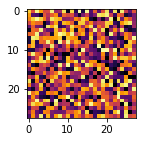

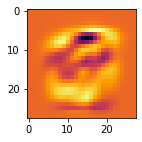

In [6]:
'''1.3. Use multiple nodes to classify every handwritten digit.'''


"""Create 10 nodes"""
Nodes = []
for i in range(10):
    Nodes.append(Perceptron(target = i, activation = "step"))
    
"""Iterate through and train, test and print outputs"""
for obj in Nodes:
    train_label = [ int(d[0] == obj.target) for d in train_data ]
    test_label = [ int(d[0] == obj.target) for d in test_data ]
    print("-----")
    print("Target:" + str(obj.target))
    obj.print_details()
    
    print("\n Testing untrained perceptron: ")
    obj.test(train_input, train_label)
    
    print("Untrained weights:")
    fig = plt.figure(figsize=(2,2))
    data = obj.weights[1:].reshape(28,28)
    plt.imshow(data, cmap="inferno_r")
    plt.draw()

    print("\n Training...")
    obj.train(train_input, train_label)
    print("Done!")

    print("\nTesting trained perceptron: ")
    obj.test(test_input, test_label)
    
    print("Trained weights:")
    fig = plt.figure(figsize=(2,2))
    data = obj.weights[1:].reshape(28,28)
    plt.imshow(data, cmap = "inferno_r")
    plt.show()